In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
import warnings
warnings.filterwarnings("ignore")

In [14]:
train_data=pd.read_csv("SalaryData_Train.csv")
test_data=pd.read_csv("SalaryData_Test.csv")

# EDA and data visualization

# Train data

In [15]:
train_data

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [17]:
train_data['age'].dtype

dtype('int64')

In [18]:
train_data.columns[:-1]

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native'],
      dtype='object')

In [19]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [20]:
train_data=train_data.dropna()

In [21]:
label=LabelEncoder()
for i in train_data.columns[:-1]:
    if(type(train_data[i][1])==str):
        train_data[i]=label.fit_transform(train_data[i])

In [22]:
np.unique(train_data["Salary"])

array([' <=50K', ' >50K'], dtype=object)

In [23]:
train_data["Salary"]=train_data["Salary"].map({' <=50K':0, ' >50K':1})

In [24]:
train_data.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

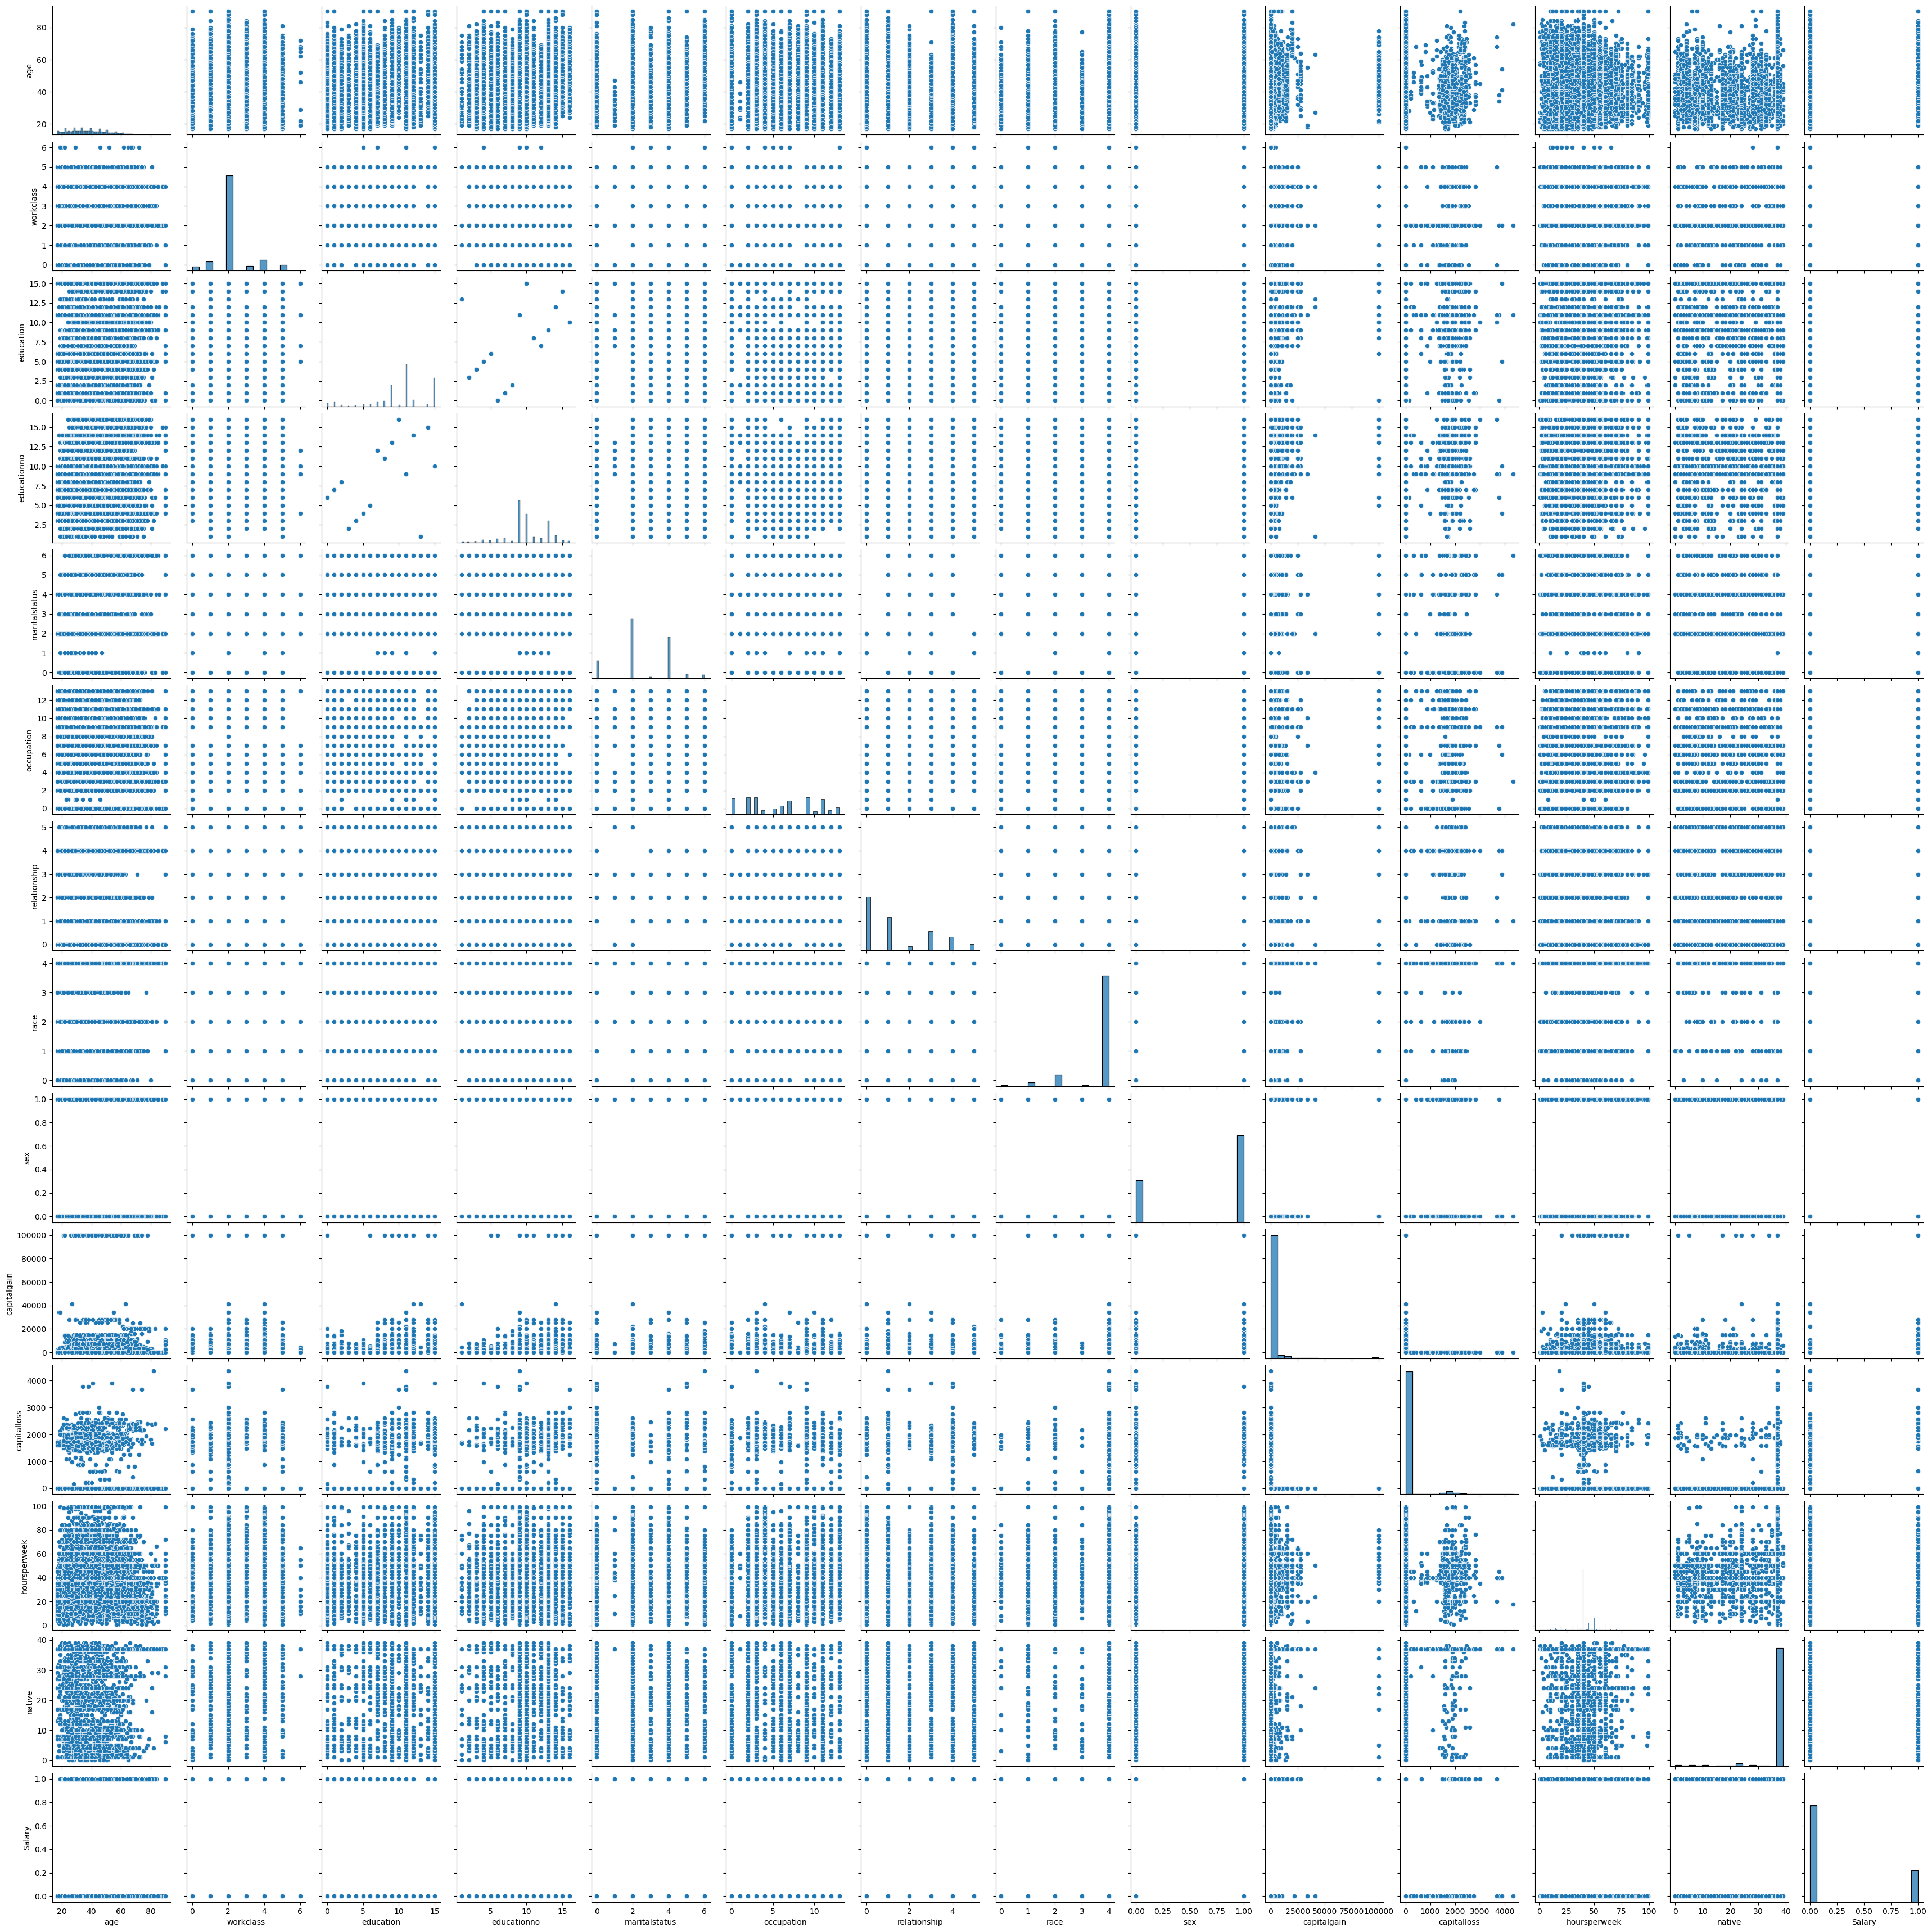

In [26]:
sns.pairplot(train_data)

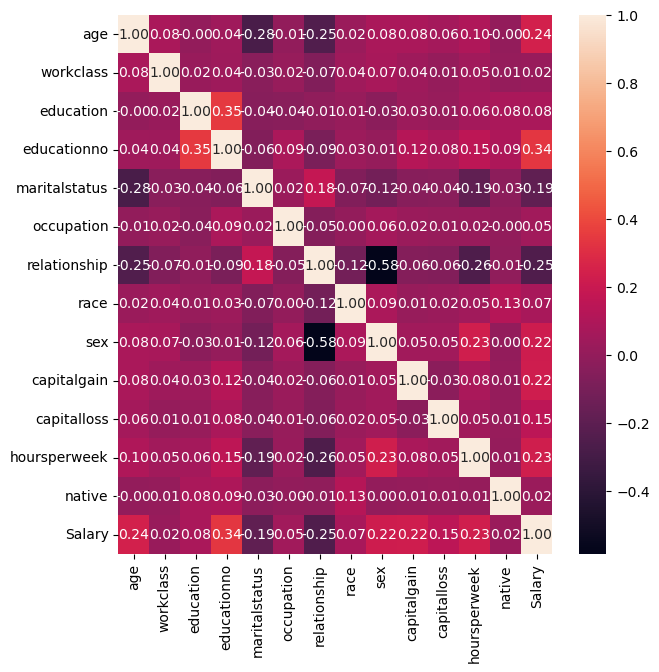

In [27]:
plt.figure(figsize=(7,7))
sns.heatmap(train_data.corr(),annot=True,fmt="0.2f")
plt.show()

# Test data

In [29]:
test_data.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [31]:
test_data.shape

(15060, 14)

In [32]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [33]:
test_data=test_data.dropna()

In [35]:
test_data["Salary"].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [36]:
label=LabelEncoder()
for i in test_data.columns[:-1]:
    if(type(test_data[i][1])==str):
        test_data[i]=label.fit_transform(test_data[i])

In [37]:
test_data["Salary"]=test_data["Salary"].map({' <=50K':0,' >50K':1})

In [38]:
test_data

age  workclass  education  educationno  maritalstatus  occupation  \
0       25          2          1            7              4           6   
1       38          2         11            9              2           4   
2       28          1          7           12              2          10   
3       44          2         15           10              2           6   
4       34          2          0            6              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   33          2          9           13              4           9   
15056   39          2          9           13              0           9   
15057   38          2          9           13              2           9   
15058   44          2          9           13              0           0   
15059   35          3          9           13              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 3     2    1            0            0            40   
1                 0     4    1            0            0            50   
2                 0     4    1            0            0            40   
3                 0     2    1         7688            0            40   
4                 1     4    1            0            0            30   
...             ...   ...  ...          ...          ...           ...   
15055             3     4    1            0            0            40   
15056             1     4    0            0            0            36   
15057             0     4    1            0            0            50   
15058             3     1    1         5455            0            40   
15059             0     4    1            0            0            60   

       native  Salary  
0          37       0  
1          37       0  
2          37       1  
3          37       1  
4          37       0  
...       ...     ...  
15055      37       0  
15056      37       0  
15057      37       0  
15058      37       0  
15059      37       1  

[15060 rows x 14 columns]

In [39]:
sns.pairplot(test_data)

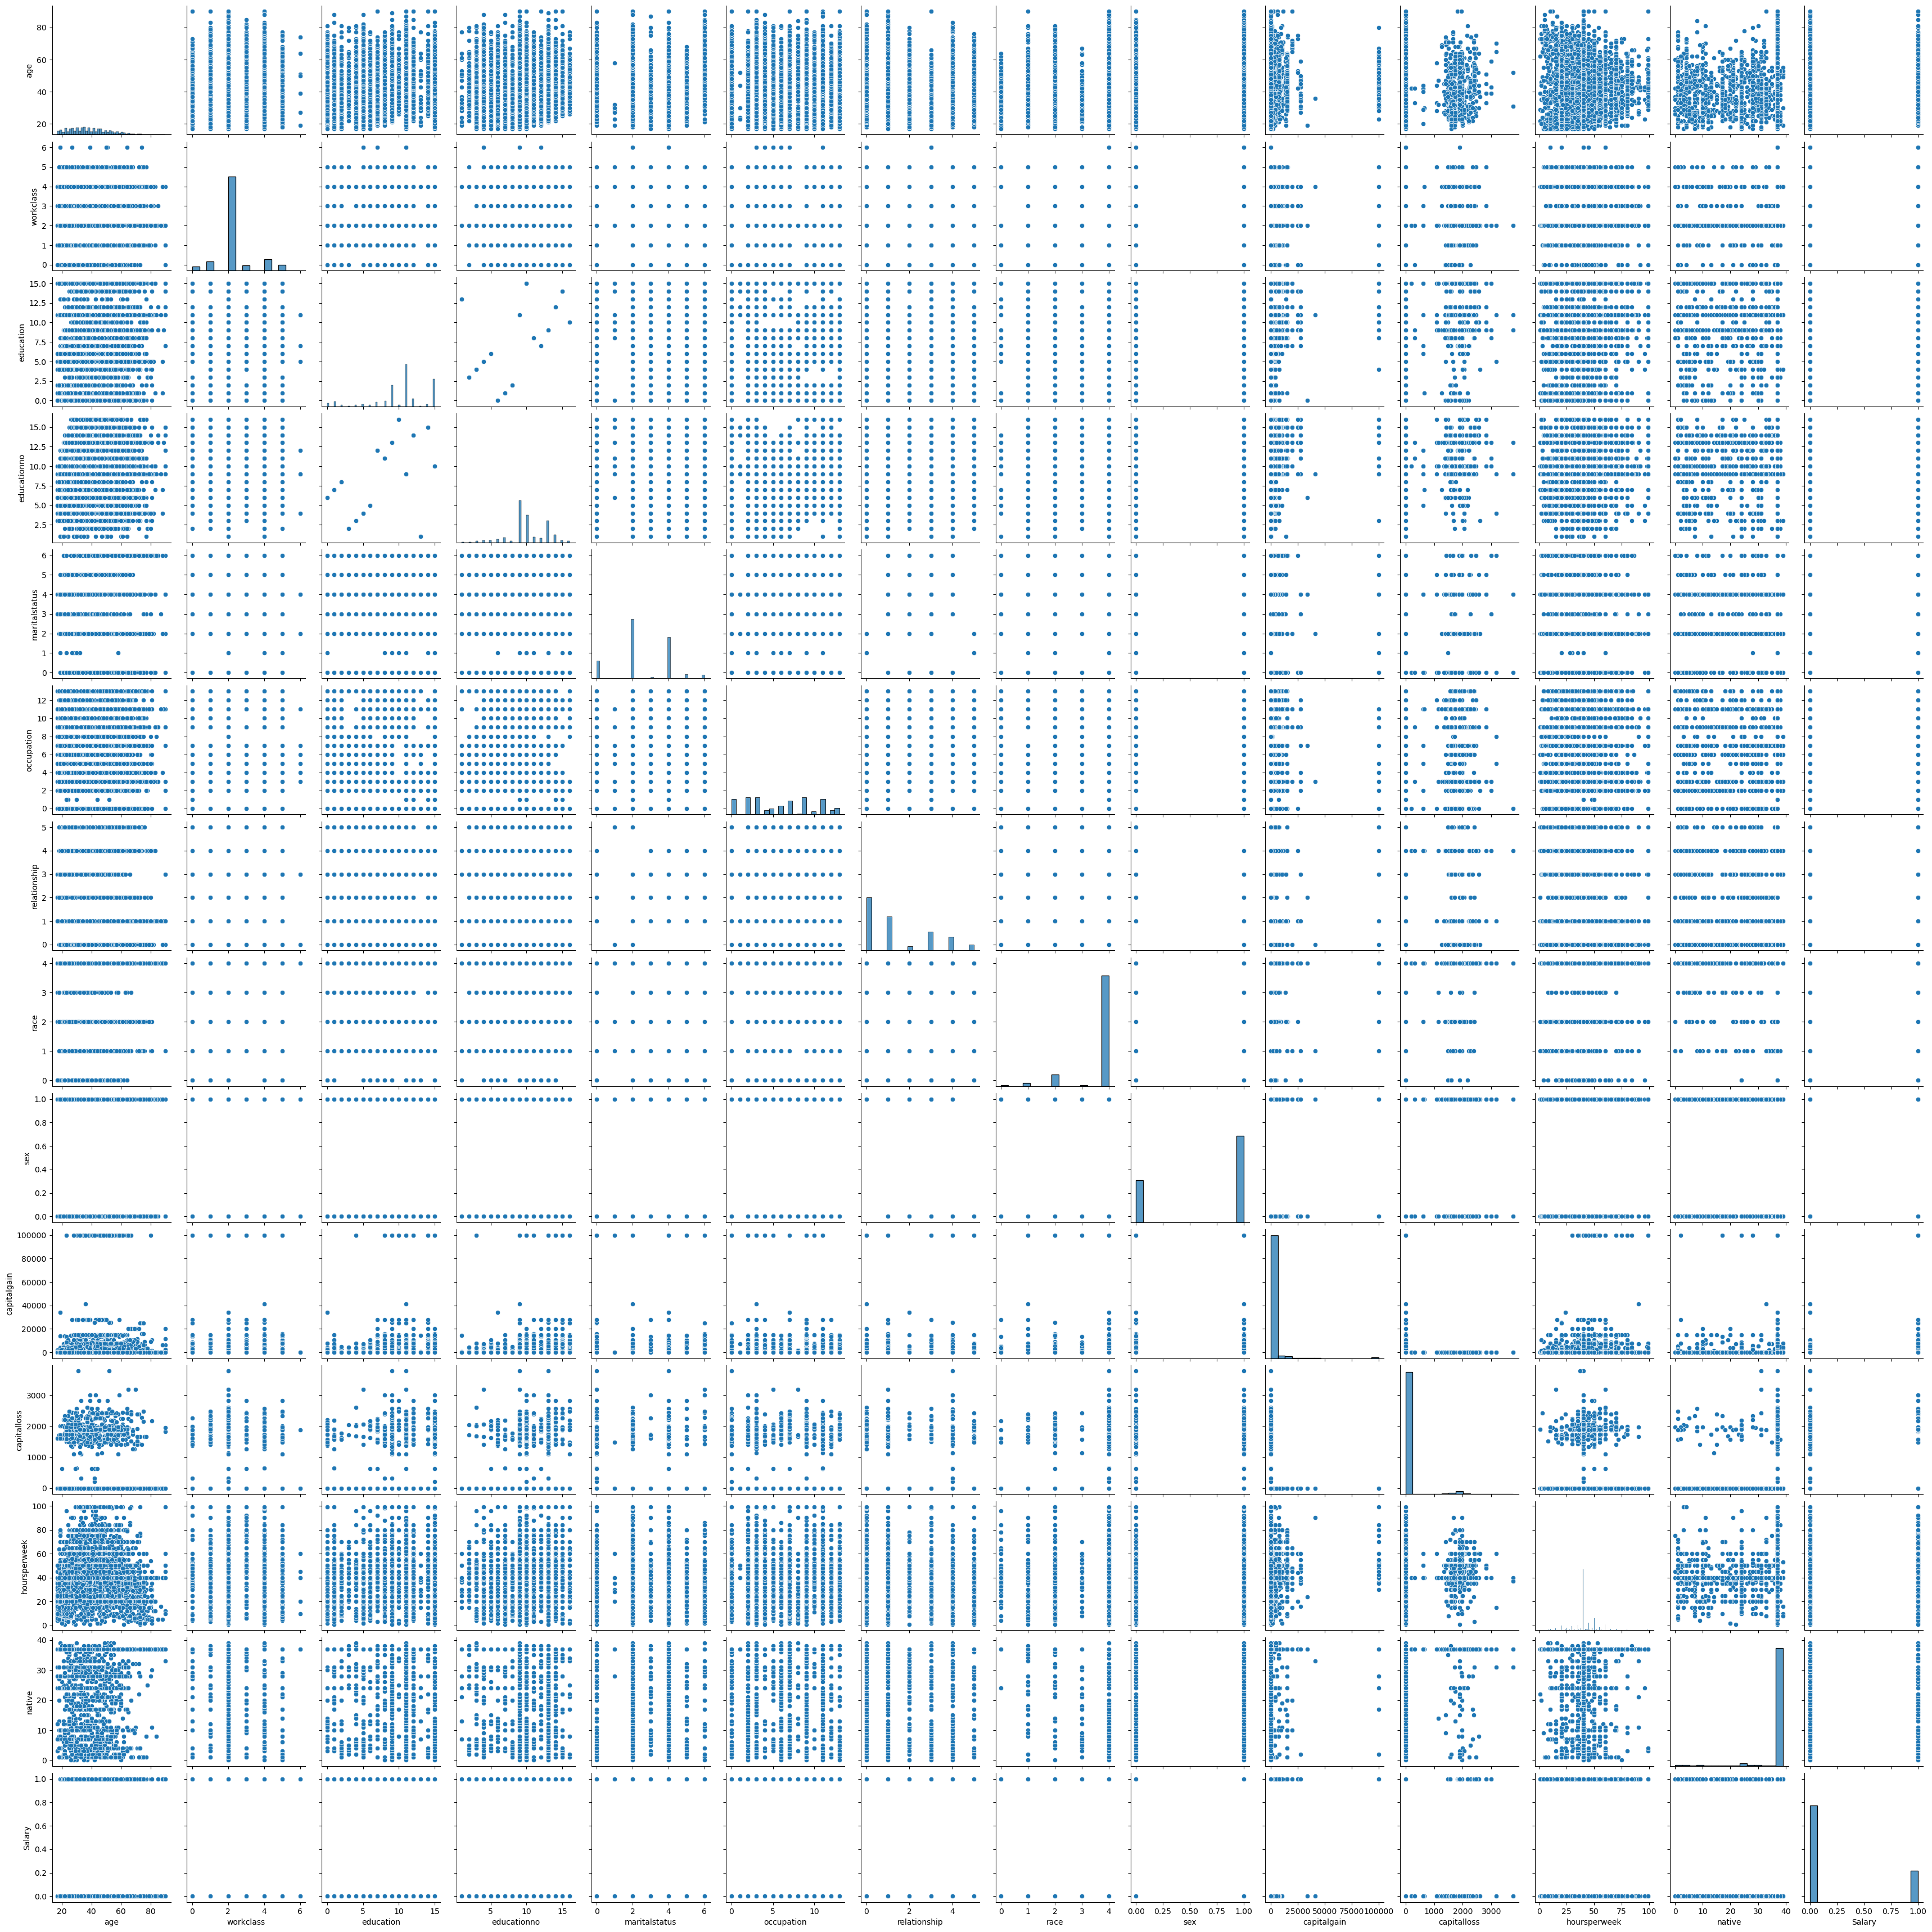

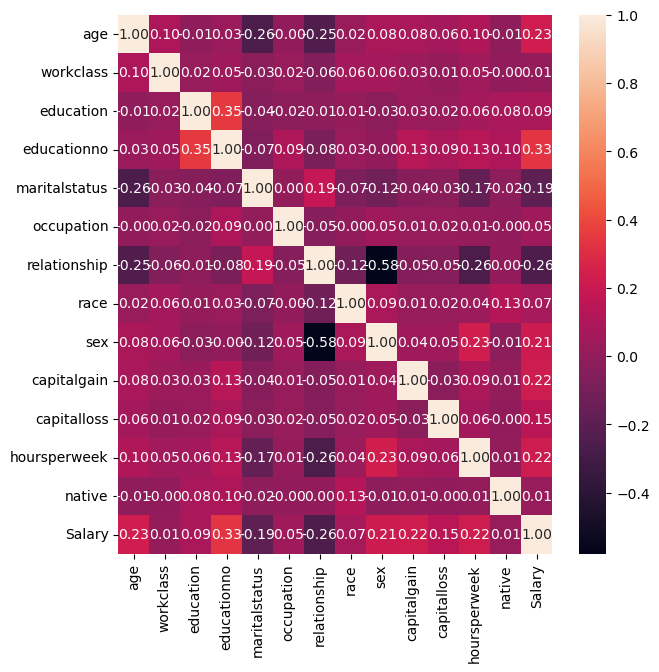

In [40]:
plt.figure(figsize=(7,7))
sns.heatmap(test_data.corr(),annot=True,fmt="0.2f")
plt.show()

In [43]:
length=len(train_data.columns)

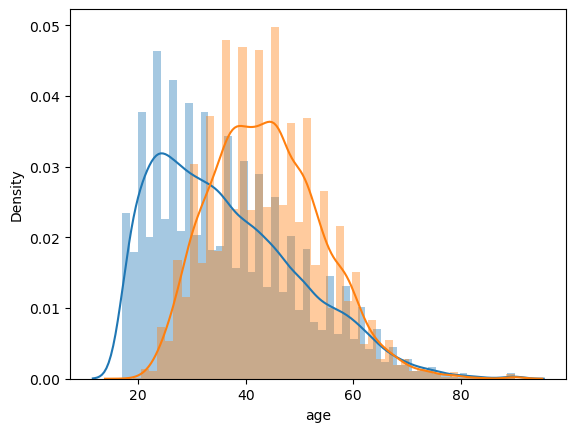

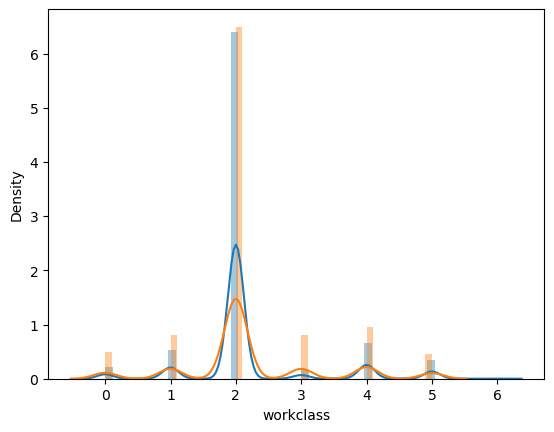

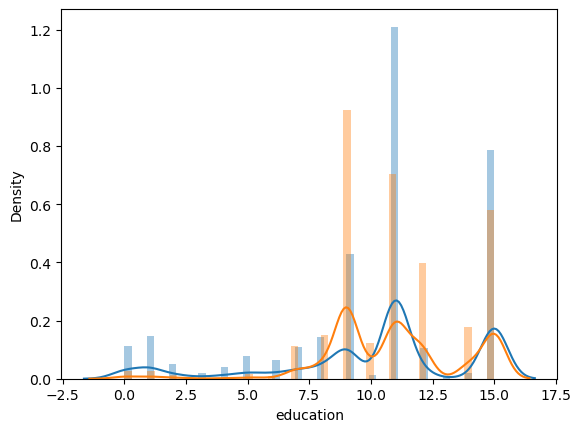

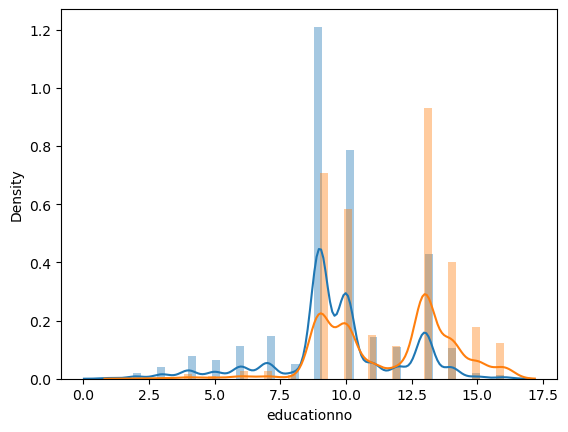

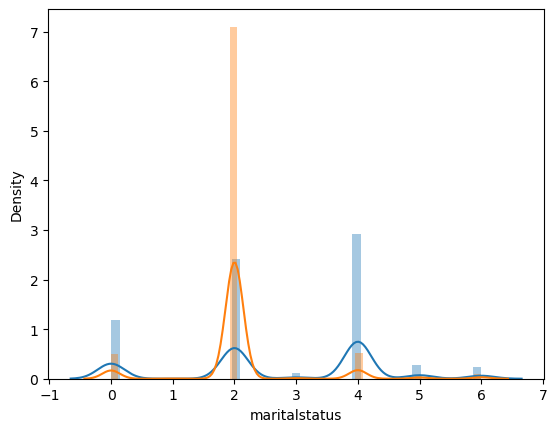

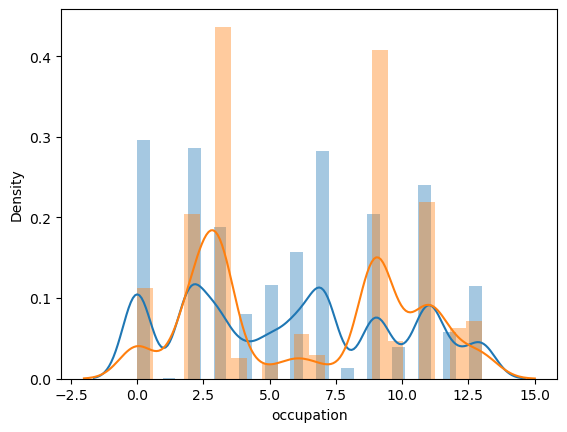

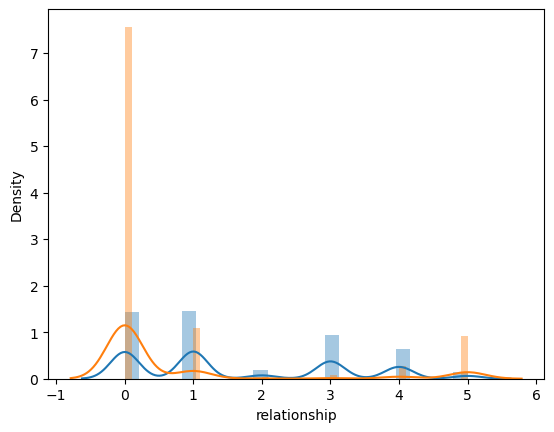

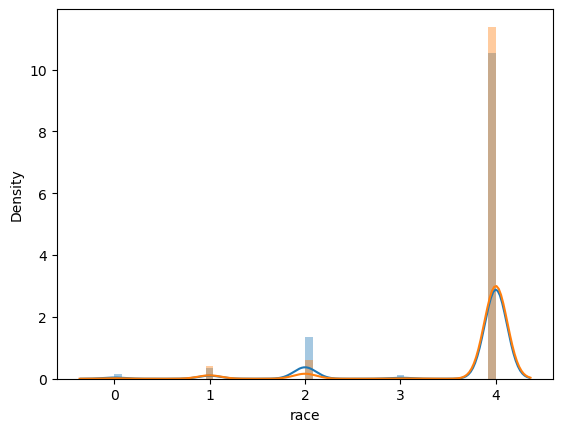

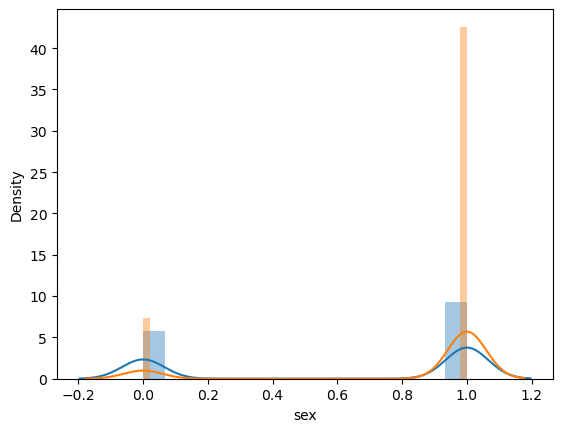

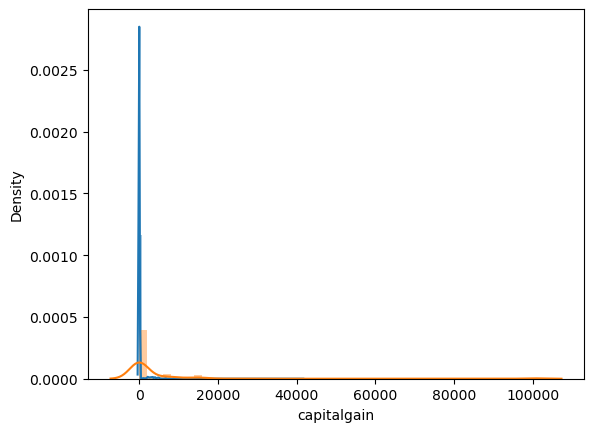

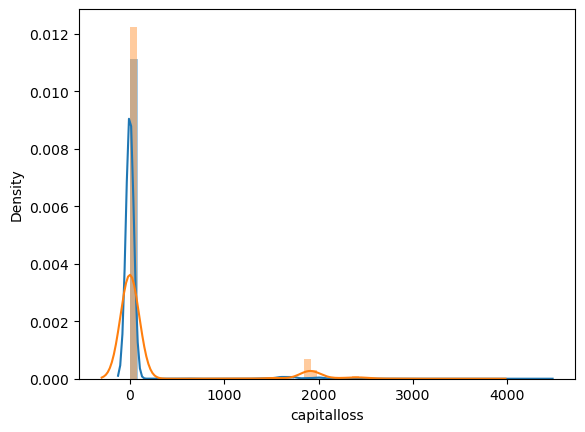

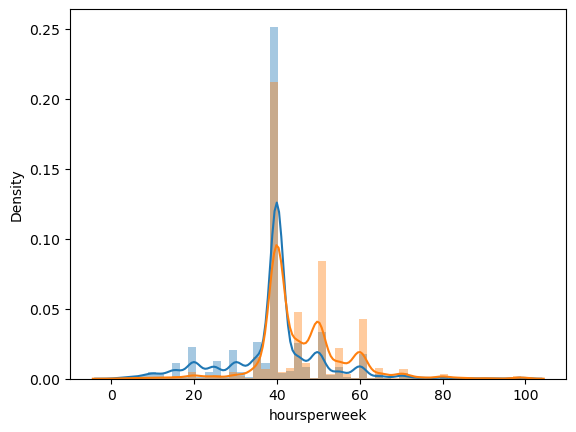

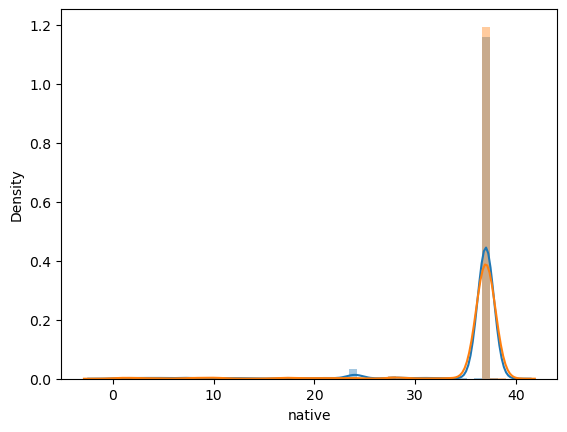

In [44]:
for i in range(0,length-1):
    sns.distplot(train_data[train_data.Salary==0].iloc[:,i],norm_hist=True)
    sns.distplot(train_data[train_data.Salary==1].iloc[:,i],norm_hist=True)     
    plt.show()

# model building

In [45]:
x_train=train_data.drop("Salary",axis=1)
x_test=test_data.drop("Salary",axis=1)
y_train=train_data["Salary"]
y_test=test_data["Salary"]

In [46]:
model=MultinomialNB()
model=model.fit(x_train,y_train)

In [47]:
pred=model.predict(x_test)

In [48]:
metrics.accuracy_score(y_test,pred)

0.7749667994687915